In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
def dft_matricial(x):
    N = len(x)  # tamanho do vetor de entrada para fazermos a matriz
    n = np.arange(N)  # vetor entrada
    k = n.reshape((N, 1))  # adequação para o calculo da matriz, forma!

    W = np.exp(-2j * np.pi * k * n / N) # construimos a matriz com os vetores obtidos anteiormente

    # Multiplicação da matriz W pelo vetor x, que será definido depois
    return np.dot(W, x)


In [4]:
# Tamanhos N que queremos testar
valores_N = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

# Tempos de execução correspondentes
tempos_execucao = []

# Loop para cada N
for N in valores_N:
    x = np.random.rand(N)  # usamos aleatório para buscarmos os piores casos
    inicio = time.time()   # marca o tempo inicial
    dft_matricial(x)       # Calcula a dft
    fim = time.time()      # marca o tempo final
    tempos_execucao.append(fim - inicio)  # salva o tempo gasto


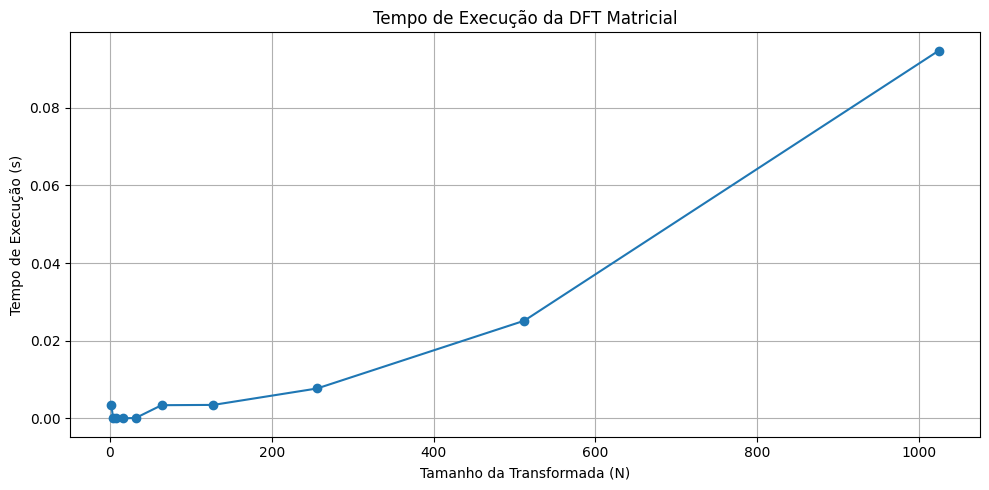

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(valores_N, tempos_execucao, marker='o')
plt.title("Tempo de Execução da DFT Matricial")
plt.xlabel("Tamanho da Transformada (N)")
plt.ylabel("Tempo de Execução (s)")
plt.grid(True)
plt.tight_layout()
plt.show()


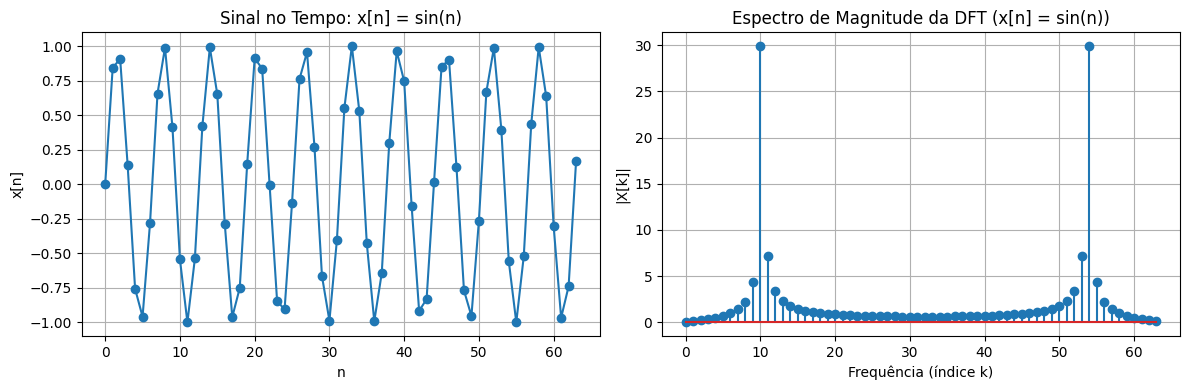

In [9]:
# Vamos também ver o funcionamento do calculo da DFT, nesse caso, usando N=64 e entrada como sen(n)
N = 64
n = np.arange(N)

# Novo sinal: x[n] = sin(n)
x_sinn = np.sin(n)
X_sinn = dft_matricial(x_sinn)

# Gráficos
plt.figure(figsize=(12, 4))

# Sinal no tempo
plt.subplot(1, 2, 1)
plt.plot(n, x_sinn, marker='o')
plt.title("Sinal no Tempo: x[n] = sin(n)")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.grid(True)

# Espectro de magnitude da DFT (sem use_line_collection)
plt.subplot(1, 2, 2)
plt.stem(np.abs(X_sinn))  # <- aqui removido o argumento
plt.title("Espectro de Magnitude da DFT (x[n] = sin(n))")
plt.xlabel("Frequência (índice k)")
plt.ylabel("|X[k]|")
plt.grid(True)

plt.tight_layout()
plt.show()




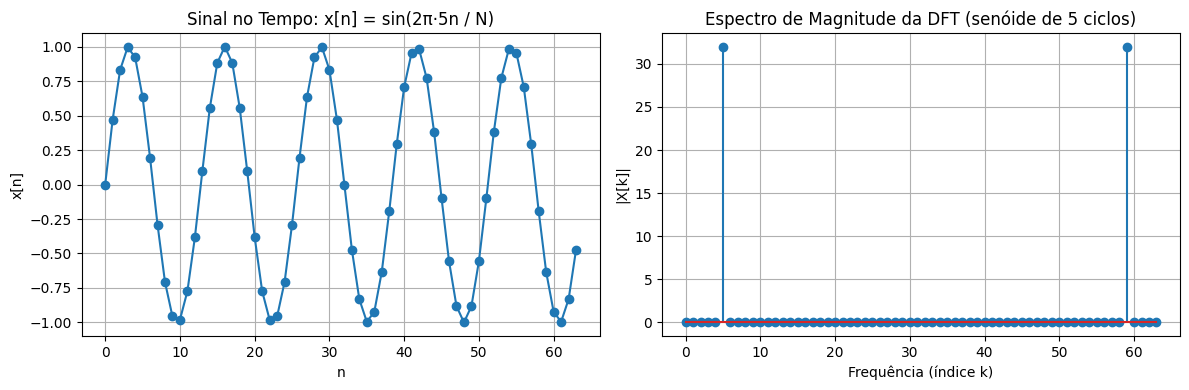

In [10]:
# Podemos também otimizar esse estudo calculando com 5 ciclos
N = 64
n = np.arange(N)

# Sinal harmônico bem definido: 5 ciclos em N amostras
x_harm = np.sin(2 * np.pi * 5 * n / N)
X_harm = dft_matricial(x_harm)

# Gráficos
plt.figure(figsize=(12, 4))

# Sinal no tempo
plt.subplot(1, 2, 1)
plt.plot(n, x_harm, marker='o')
plt.title("Sinal no Tempo: x[n] = sin(2π·5n / N)")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.grid(True)

# Espectro de magnitude da DFT
plt.subplot(1, 2, 2)
plt.stem(np.abs(X_harm))  # Sem use_line_collection
plt.title("Espectro de Magnitude da DFT (senóide de 5 ciclos)")
plt.xlabel("Frequência (índice k)")
plt.ylabel("|X[k]|")
plt.grid(True)

plt.tight_layout()
plt.show()


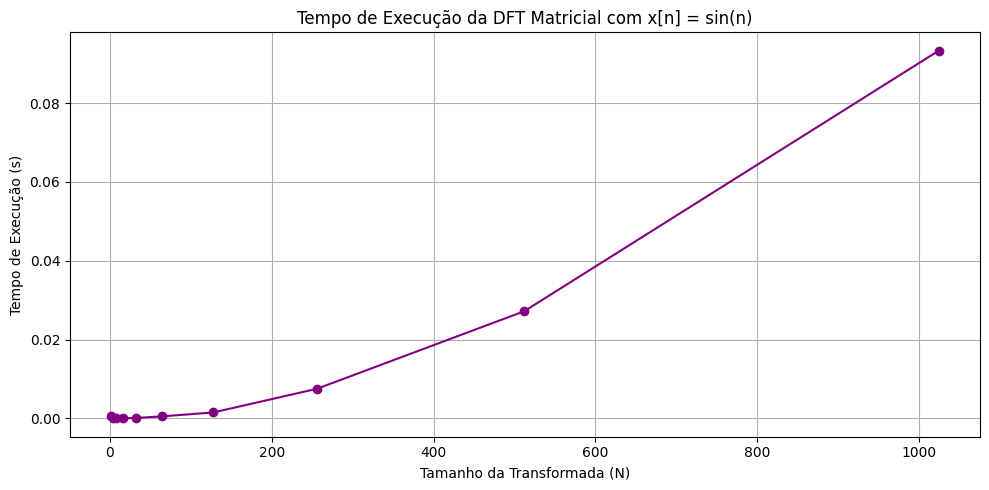

In [11]:
# Por fim, podemos ver o desempenho dos tempos usando a função seno no lugar de uma vetor aleatório
valores_N = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
tempos_sin_n = []

# Medição de tempo para cada N com sinal x[n] = sin(n)
for N in valores_N:
    n = np.arange(N)
    x = np.sin(n)

    inicio = time.time()
    dft_matricial(x)
    fim = time.time()

    tempos_sin_n.append(fim - inicio)

# Plot do gráfico final
plt.figure(figsize=(10, 5))
plt.plot(valores_N, tempos_sin_n, marker='o', linestyle='-', color='purple')
plt.title("Tempo de Execução da DFT Matricial com x[n] = sin(n)")
plt.xlabel("Tamanho da Transformada (N)")
plt.ylabel("Tempo de Execução (s)")
plt.grid(True)
plt.tight_layout()
plt.show()
